In [4]:
pip install missingno

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import sklearn

# Data Reading

In [6]:
train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [7]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [8]:
train.shape

(43400, 12)

In [9]:
test.shape

(18601, 11)

In [10]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [11]:
list(train.columns)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

# Data Cleaning


**Identifing missing attributes**

In [12]:
train_missing_values=train.isnull().sum()
train_missing_values

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [13]:
test_missing_values=test.isnull().sum()
test_missing_values

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

<Axes: >

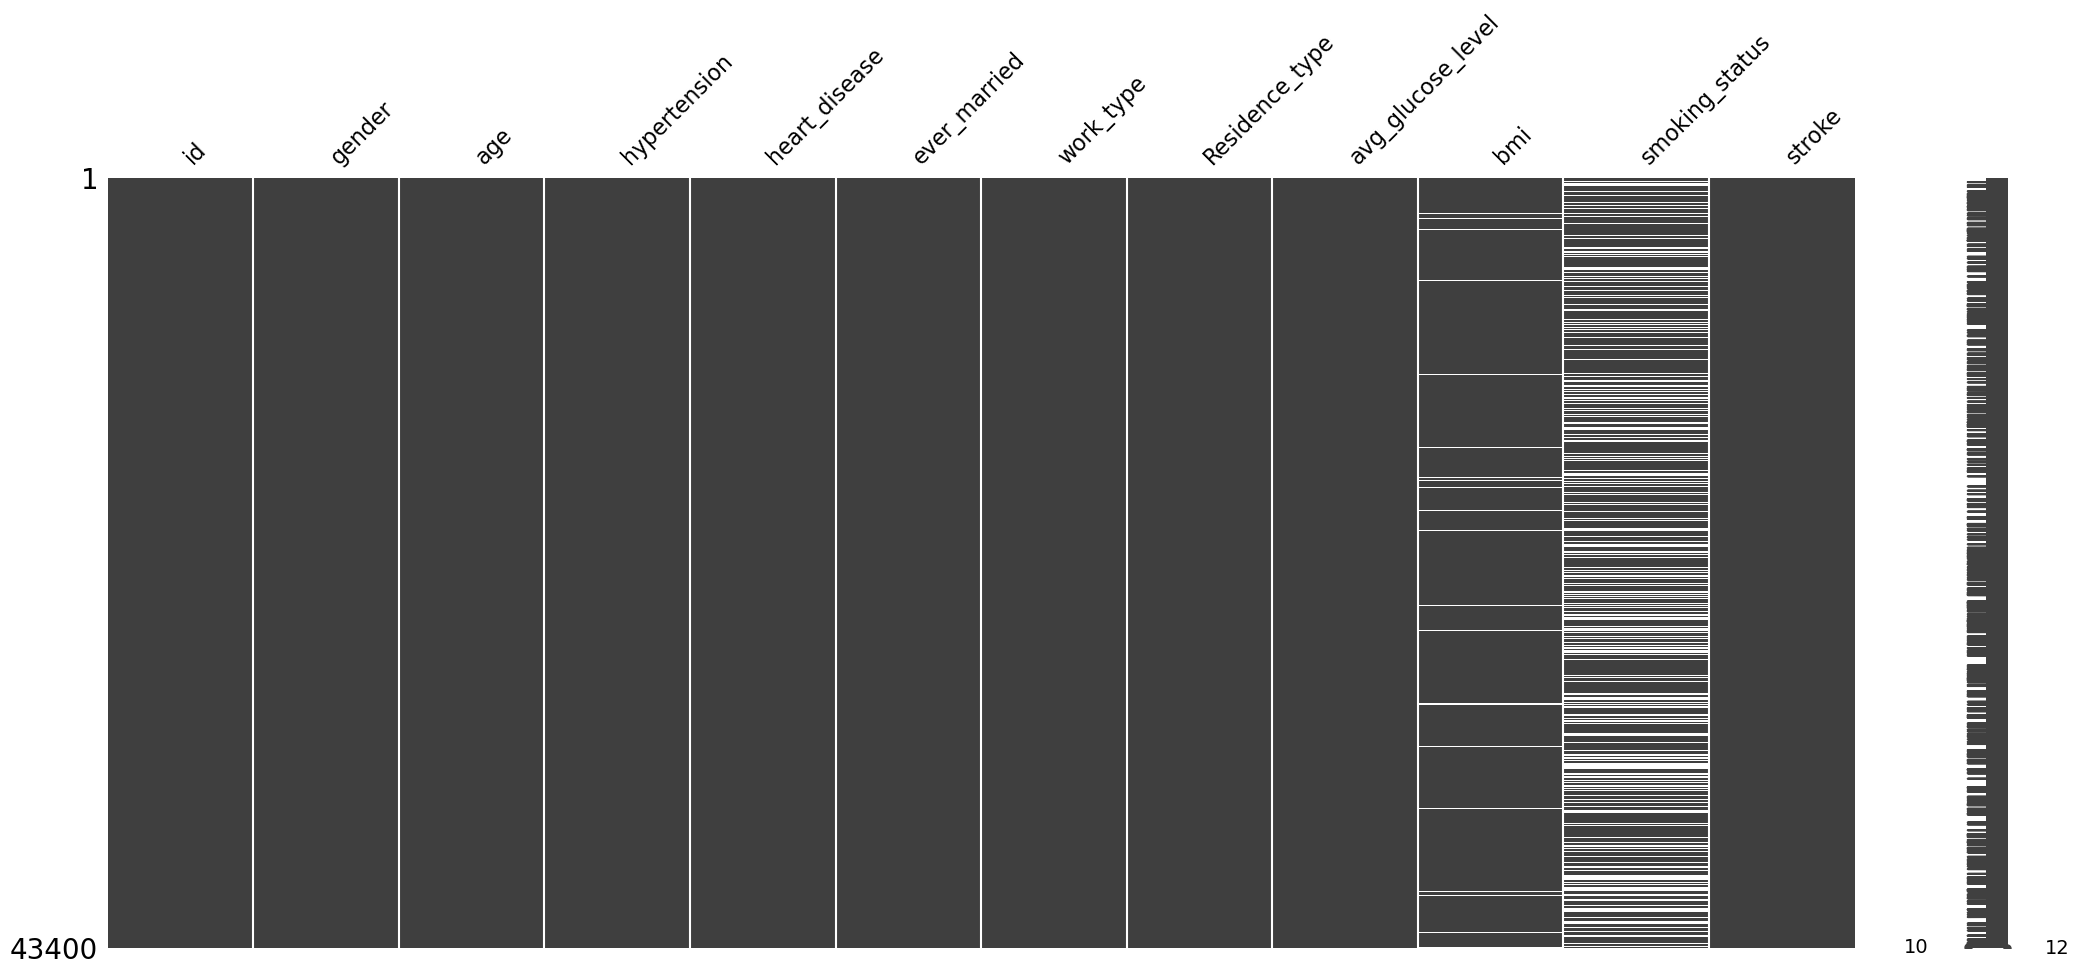

In [14]:
ms.matrix(train)

**Removing missing values**

In [15]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")
print('train data shape: {}' .format(train_data.shape))
print('test data shape: {}' .format(test_data.shape))

train data shape: (29072, 12)
test data shape: (12423, 11)


<Axes: >

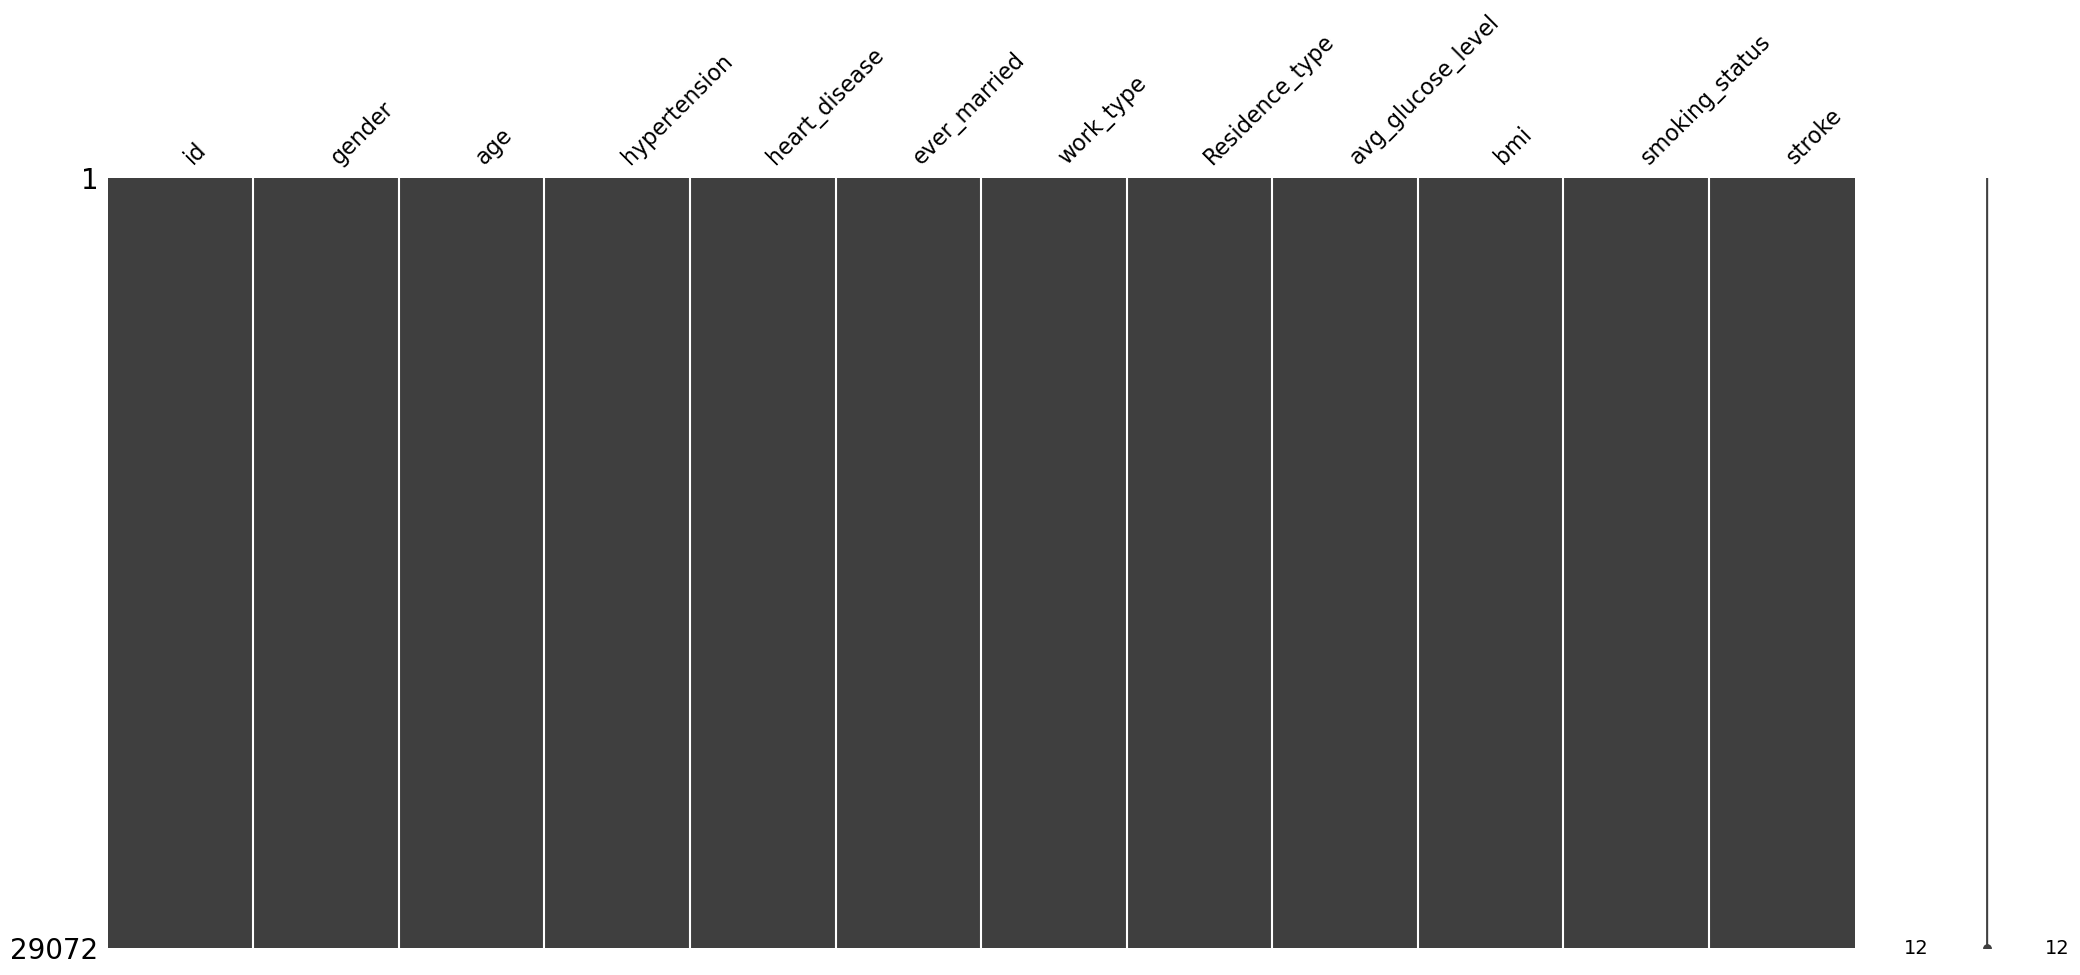

In [16]:
ms.matrix(train_data)

<Axes: >

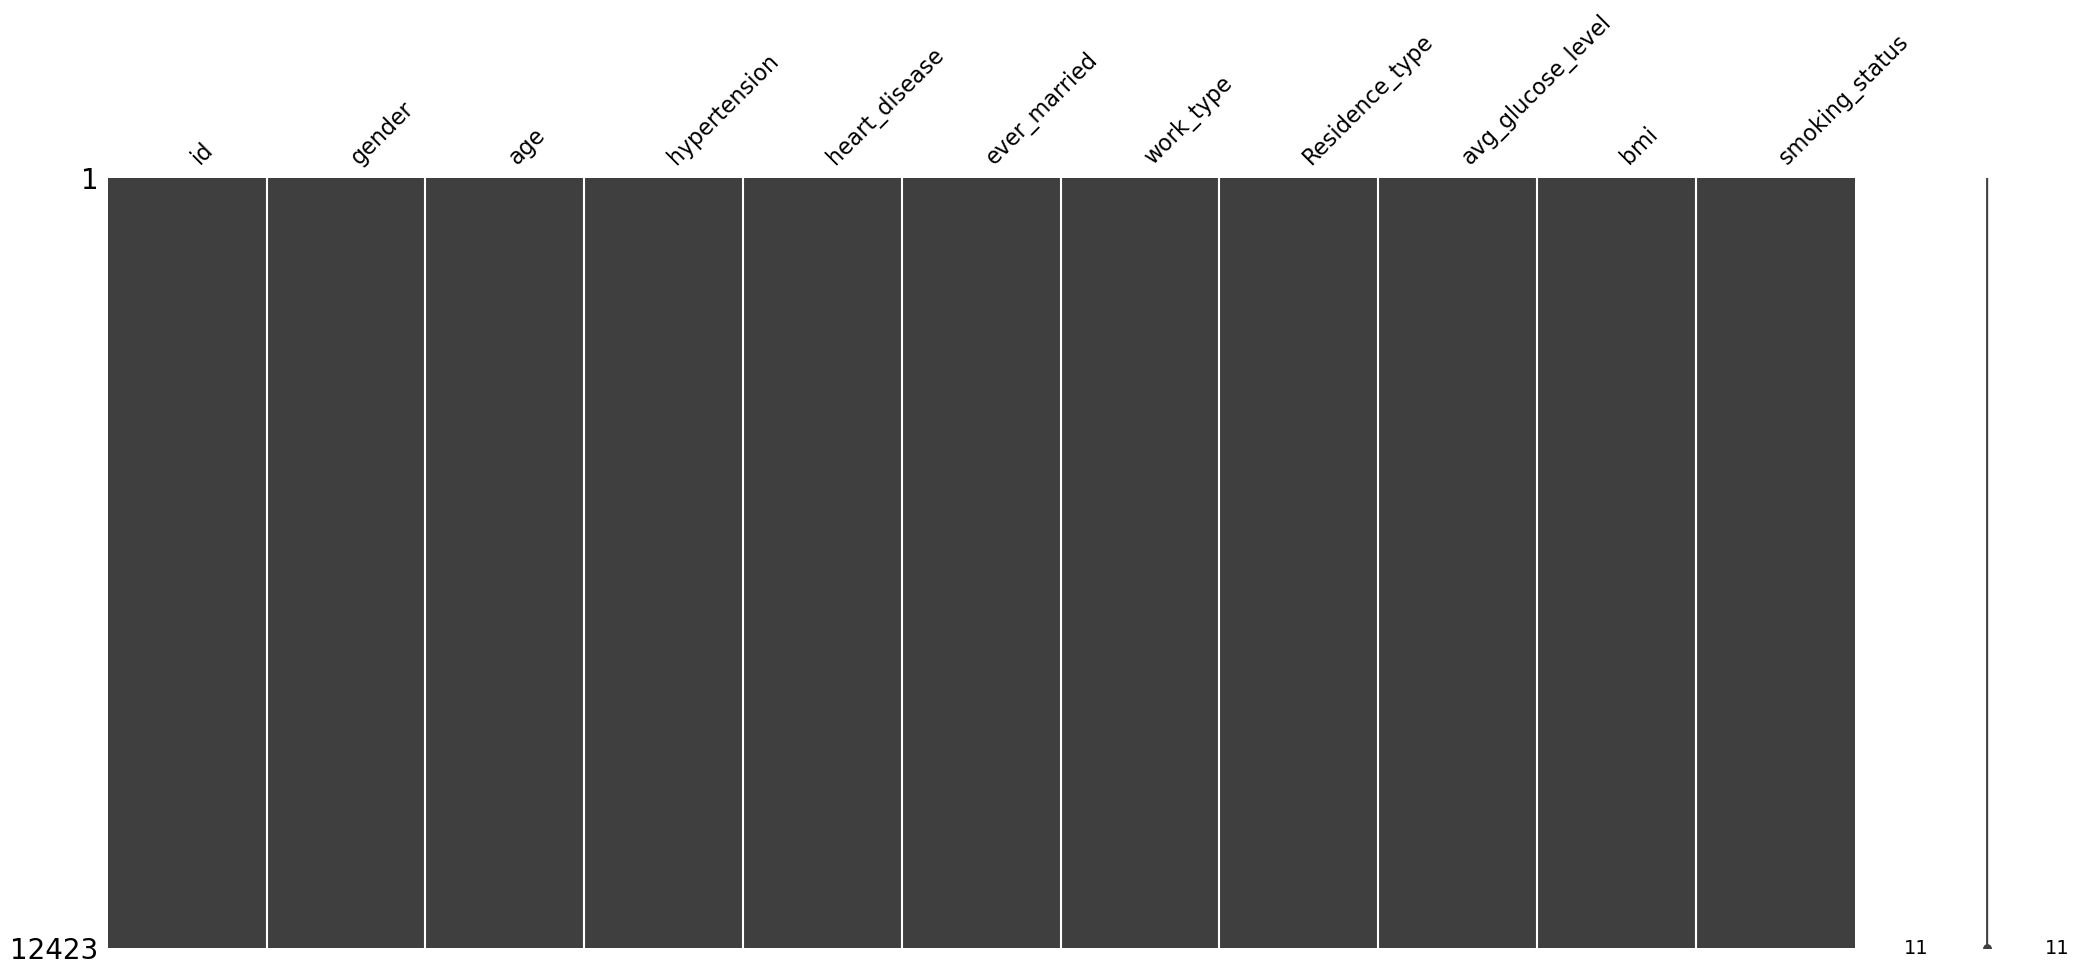

In [17]:
ms.matrix(test_data)

# Pattern Recognition

In [18]:
train_data["stroke"].value_counts()

0    28524
1      548
Name: stroke, dtype: int64

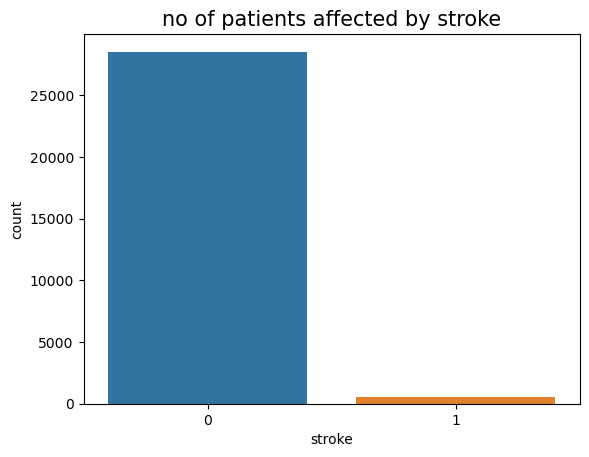

In [22]:
sns.countplot(x=train_data["stroke"])
plt.title("no of patients affected by stroke", fontsize=15)
plt.show()

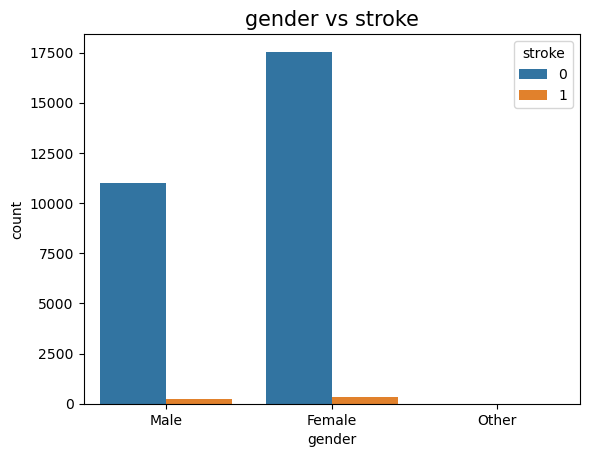

In [23]:
sns.countplot(x=train_data["gender"], hue=train_data["stroke"])
plt.title("gender vs stroke", fontsize=15)
plt.show()

In [24]:
train_data.groupby(["gender"])["stroke"].value_counts()


gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: stroke, dtype: int64

In [25]:
train_data["smoking_status"].value_counts()

never smoked       15747
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

In [27]:
train_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [30]:
train_data.groupby(["gender"])["smoking_status"].value_counts()


gender  smoking_status 
Female  never smoked       10406
        formerly smoked     3926
        smokes              3520
Male    never smoked        5340
        formerly smoked     3167
        smokes              2706
Other   formerly smoked        6
        never smoked           1
Name: smoking_status, dtype: int64

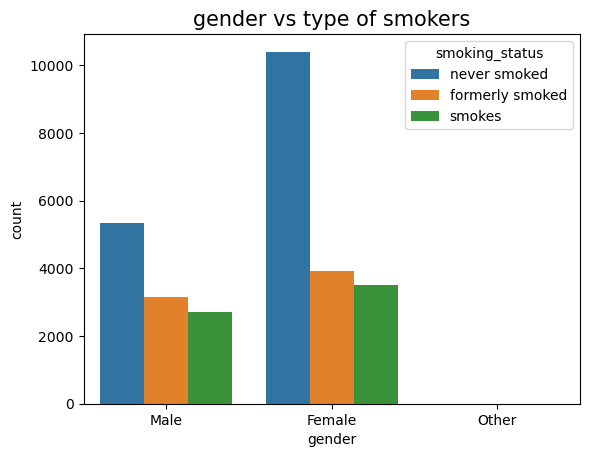

In [31]:
sns.countplot(x=train_data["gender"], hue=train_data["smoking_status"])
plt.title("gender vs type of smokers", fontsize=15)
plt.show()

### conversion of string type to int type

In [32]:
str_data=train_data.select_dtypes(include=['object'])
str_dt=test_data.select_dtypes(include=['object'])

In [33]:
int_data=train_data.select_dtypes(include=['integer', 'float'])
int_dt=test_data.select_dtypes(include=['integer', 'float'])


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [39]:
df=pd.DataFrame(features)

In [40]:
df

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,0,4,1,1,56196,10.0,0,0,58.64,20.4,0
43396,0,1,0,1,0,5450,56.0,0,0,213.61,55.4,0
43397,0,1,2,1,0,28375,82.0,1,0,91.94,28.9,0
43398,1,1,2,1,1,27973,40.0,0,0,99.16,33.2,0


In [41]:
test1=str_dt.apply(label.fit_transform)
Test=test1.join(int_dt)
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


# Modelling & predicting the data

In [42]:
xtrain=features.drop(["stroke"],axis=1)
xtrain.shape

(29072, 11)

In [43]:
ytrain=features["stroke"]
ytrain.head()
ytrain.shape

(29072,)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [45]:
x_test.shape

(7268, 11)

In [46]:
y_test.shape

(7268,)

In [47]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
28585,1,1,0,0,0,2141,66.0,1,0,191.67,31.8
15636,0,1,2,0,1,57351,77.0,0,0,208.29,30.2
20494,0,1,0,0,0,1750,56.0,0,0,86.22,19.1
40952,0,1,2,1,1,2165,69.0,0,0,108.22,22.5
6688,0,0,2,1,1,32819,18.0,0,0,87.04,23.6


In [48]:
y_train.head()

28585    0
15636    0
20494    0
40952    0
6688     0
Name: stroke, dtype: int64

## Naive_Bayes

In [49]:
x_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
31905,0,1,2,0,1,72898,67.0,1,1,199.24,33.9
23522,1,0,2,0,1,32846,29.0,0,0,99.95,28.3
37181,0,1,0,1,1,12353,41.0,0,0,107.62,23.7
25417,0,1,2,1,1,40891,23.0,0,0,91.55,19.3
27253,1,1,2,1,1,64092,52.0,0,0,103.40,26.6


In [50]:
y_test.head()

31905    1
23522    0
37181    0
25417    0
27253    0
Name: stroke, dtype: int64

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [53]:
predict=model.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
test_score=model.score(x_test, y_test)
print("NBtest_score:", test_score)           

NBtest_score: 0.9734452394056137


### Confusion matrix

In [55]:
nb_conf_mtr=pd.crosstab(y_test, predict)
nb_conf_mtr

col_0,0,1
stroke,,
0,7071,45
1,148,4


### Report for Naive_Bayes 

In [56]:
from sklearn.metrics import classification_report

In [57]:
nbreport=classification_report(y_test, predict)
print(nbreport)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7116
           1       0.08      0.03      0.04       152

    accuracy                           0.97      7268
   macro avg       0.53      0.51      0.51      7268
weighted avg       0.96      0.97      0.97      7268



## Decision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt_mod=DecisionTreeClassifier()
dt_mod.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
y_predict=dt_mod.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
ts_dt_score=dt_mod.score(x_test, y_test)
print("Decision tree test score:", ts_dt_score)

Decision tree test score: 0.9566593285635663


### Reports for decision tree

In [62]:
dectree_report=classification_report(y_test, y_predict)
print(dectree_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7116
           1       0.05      0.07      0.06       152

    accuracy                           0.96      7268
   macro avg       0.52      0.52      0.52      7268
weighted avg       0.96      0.96      0.96      7268



In [63]:
dt_conf_mtr=pd.crosstab(y_test, y_predict)
dt_conf_mtr

col_0,0,1
stroke,,
0,6943,173
1,142,10



### Random Forest

In [64]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100)

In [65]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
y_pred_rfc = rfc.predict(x_test)

In [67]:
print(pd.crosstab(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

col_0      0
stroke      
0       7116
1        152


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7116
           1       0.00      0.00      0.00       152

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.49      7268
weighted avg       0.96      0.98      0.97      7268



In [68]:
from sklearn.neural_network import MLPClassifier

In [69]:
mlp=MLPClassifier()

In [70]:
mlp.fit(x_train,y_train)

y_pred_mlp = mlp.predict(x_test)

In [ ]:
mlp.score(x_test,y_test)

0.9810126582278481

In [ ]:
## Cross validating accuracies

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9757842475511938

In [ ]:
cross_val_score(dt_mod,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9580693693548709

In [ ]:
cross_val_score(rfc,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9811159333580098

In [ ]:
cross_val_score(mlp,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9798779691214212

### Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(xtrain)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [ ]:
model_2=GaussianNB()
model_2.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
test_score=model_2.score(x_test, y_test)
print("NBtest_score:", test_score)  

NBtest_score: 0.9756466703357182


In [ ]:
dt_mod=DecisionTreeClassifier()
dt_mod.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
ts_dt_score=dt_mod.score(x_test, y_test)
print("Decision tree test score:", ts_dt_score)

Decision tree test score: 0.9606494221243809


In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rfc = rfc.predict(x_test)

In [ ]:
print(pd.crosstab(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

col_0      0  1
stroke         
0       7132  2
1        134  0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7134
           1       0.00      0.00      0.00       134

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



In [ ]:
rfc.score(x_test,y_test)

0.9812878370941112

In [ ]:

mlp=MLPClassifier()

mlp.fit(x_train,y_train)

y_pred_mlp = mlp.predict(x_test)

mlp.score(x_test,y_test)

0.9815630159603742

In [ ]:
cross_val_score(model_2,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

In [ ]:
cross_val_score(dt_mod,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9592044775737909

In [ ]:
cross_val_score(rfc,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9811503212534707

In [ ]:
cross_val_score(mlp,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9547403702059297